In [1]:
## Install the library first
#!pip install artscraper
#!pip install git+https://github.com/sodascience/artscraper.git
from pathlib import Path

from artscraper import GoogleArtScraper, WikiArtScraper

# to show the images
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# 1. Downloading images one by one

Use this mode to download images one by one, or to debug your workflow

## 1.1. WikiArt

Make sure to obtain [the API keys](https://www.wikiart.org/en/App/GetApi).

{'id': '57726e1fedc2cb3880b5ffb7', 'title': 'Anxiety', 'url': 'anxiety-1894', 'artistUrl': 'edvard-munch', 'artistName': 'Munch Edvard ', 'artistId': '57726d7bedc2cb3880b47a89', 'completitionYear': 1894, 'dictionaries': ['57726b51edc2cb3880ad7588', '57726b4eedc2cb3880ad6e58', '57726bcdedc2cb3880ae733e', '57726b4eedc2cb3880ad6f70'], 'location': 'OsloNorway', 'period': {'id': '57726d7bedc2cb3880b47a8f', 'title': 'European period'}, 'serie': None, 'genres': ['genre painting'], 'styles': ['Expressionism'], 'media': ['oil', 'canvas'], 'sizeX': 74.0, 'sizeY': 94.0, 'diameter': None, 'galleries': ['Munch Museum, Oslo, Norway'], 'tags': [], 'description': '', 'width': 461, 'image': 'https://uploads5.wikiart.org/images/edvard-munch/anxiety-1894.jpg!Large.jpg', 'height': 600, 'link': 'https://www.wikiart.org/en/edvard-munch/anxiety-1894'}


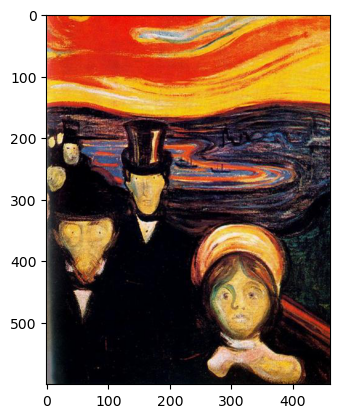

In [11]:
Path("data").mkdir(exist_ok=True)

art_url = "https://www.wikiart.org/en/edvard-munch/anxiety-1894"

with WikiArtScraper() as scraper:
    scraper.load_link(art_url)
    metadata = scraper.get_metadata()
    scraper.save_image("data/wikiart_example.jpg")
    print(metadata)

# display the image
img = mpimg.imread("data/wikiart_example.jpg")
plt.imshow(img)
plt.show()

## 1.2 GoogleArt

ArtScraper will open a new Firefox window, navigate to the image, zoom on it and take a screenshot of it. It will take a few seconds. Do not minimize that browser, and do not let the screensaver go on.


In [ ]:
art_url = "https://artsandculture.google.com/asset/helena-hunter-fairytales/dwFMypq0ZSiq6w"

with GoogleArtScraper() as scraper:
    scraper.load_link(art_url)
    metadata = scraper.get_metadata()
    scraper.save_image("data/googleart_example.png")
    print(metadata)

# display the image
img = mpimg.imread("data/googleart_example.png")
plt.imshow(img)
plt.show()

# 2. Downloading many urls automatically

Use this mode to download many images. Each artwork will be downloaded in its own folder (containing the image and the metadata) within the folder specified in the argument `output_dir`.

## 2.1 WikiArt example

In [4]:
some_links = [
    "https://www.wikiart.org/en/edvard-munch/anxiety-1894",
    "https://www.wikiart.org/en/aleksandra-ekster/still-life-1913",
    "https://www.wikiart.org/en/aleksandra-ekster/view-of-paris-1912"
]

with WikiArtScraper(output_dir="data") as scraper:
    for url in some_links:
        # Will save metadata and image in different folders
        scraper.save_artwork_information(url)

## 2.2 GoogleArt example
ArtScraper will open a new Firefox window, navigate to the image, zoom on it and take a screenshot of it. It will take a few seconds. Do not minimize that browser, and do not let the screensaver go on.


In [5]:
some_links = [
    "https://artsandculture.google.com/asset/helena-hunter-fairytales/dwFMypq0ZSiq6w",
    "https://artsandculture.google.com/asset/erina-takahashi-and-isaac-hernandez-in-fantastic-beings-laurent-liotardo/MQEhgoWpWJUd_w",
    "https://artsandculture.google.com/asset/rinaldo-roberto-masotti/swG7r2rgfvPOFQ"
]

with GoogleArtScraper("data") as scraper: 
    for url in some_links:
        # Will save metadata and image in different folders
        scraper.save_artwork_information(url)